In [5]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
from mega import model_df
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [6]:
model_df_copy = model_df.copy()

In [7]:
model_df_copy

,Gm#,W/L,D/N,H/A,Opp,COL_at_bats,COL_ba,COL_hits,COL_hr,COL_kk,COL_obp,COL_walks,Opp_at_bats,Opp_ba,Opp_hits,OPP_HR_Column,OPP_kk,Opp_obp,Opp_walks
0,1,L,D,A,MIL,31,0.258065,8,1,8,0.351351,4,38,0.315789,12,3,11,0.333333,1
1,2,W,N,A,MIL,32,0.281250,9,1,5,0.342857,3,37,0.378378,14,2,11,0.390244,2
2,3,W,N,A,MIL,34,0.264706,9,1,5,0.305556,2,37,0.405405,15,3,8,0.463415,4
3,4,W,D,H,SDP,33,0.212121,7,0,8,0.235294,1,0,0.000000,0,0,0,0.000000,0
4,5,W,N,H,SDP,33,0.242424,8,0,4,0.305556,3,0,0.000000,0,0,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1808,129,L,N,A,NYY,28,0.178571,5,2,5,0.233333,2,31,0.129032,4,0,9,0.205882,3
1809,130,W,D,A,NYY,29,0.172414,5,1,9,0.294118,4,39,0.333333,13,2,14,0.386364,4
1810,131,L,D,A,NYY,35,0.342857,12,5,6,0.410256,3,29,0.206897,6,0,8,0.323529,5
1811,132,W,N,H,MIA,34,0.264706,9,0,8,0.324324,3,28,0.214286,6,1,11,0.312500,4


In [9]:
# Load the dataset from CSV
file_path = 'model_df_copy.csv'  

# File path is
model_df_copy = pd.read_csv('model_df_copy.csv')

In [10]:
# Define the target variable 'y' and encode it
y = model_df_copy['W/L']
label_encoder = LabelEncoder()

# Convert 'W' to 1 and 'L' to 0
y_encoded = label_encoder.fit_transform(y)  

# Define the feature set 'X'
X = model_df_copy[['COL_at_bats', 'COL_ba', 'COL_hits', 'COL_hr', 'COL_kk', 
                   'COL_obp', 'COL_walks', 'Opp_at_bats', 'Opp_ba', 'Opp_hits', 
                   'OPP_HR_Column', 'OPP_kk', 'Opp_obp', 'Opp_walks']]

In [11]:
# Convert non-numeric values to NaN and fill with median
X['Opp_hits'] = pd.to_numeric(X['Opp_hits'], errors='coerce')
X['OPP_kk'] = pd.to_numeric(X['OPP_kk'], errors='coerce')
X = X.fillna(X.median(numeric_only=True))

C:\Users\sando\AppData\Local\Temp\ipykernel_32692\2360452142.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Opp_hits'] = pd.to_numeric(X['Opp_hits'], errors='coerce')
C:\Users\sando\AppData\Local\Temp\ipykernel_32692\2360452142.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['OPP_kk'] = pd.to_numeric(X['OPP_kk'], errors='coerce')


In [12]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

In [14]:
# Initialize the SVM classifier with an RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [15]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the Model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[261  51]
 [ 68 146]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.81       312
           1       0.74      0.68      0.71       214

    accuracy                           0.77       526
   macro avg       0.77      0.76      0.76       526
weighted avg       0.77      0.77      0.77       526



In [16]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Types of kernels to consider
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.8032653061224488


In [17]:
# Define the parameter grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Types of kernels to consider
}


In [18]:

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [19]:

# Display the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.8032653061224488


In [23]:
import seaborn as sns  
import matplotlib.pyplot as plt
import seaborn as sns  

# Confusion matrix for the original model
original_conf_matrix = confusion_matrix(y_test, svm_model.predict(X_test))


In [24]:

# Confusion matrix for the best model after tuning
best_model = SVC(C=1, gamma='scale', kernel='linear', random_state=42)
best_model.fit(X_train, y_train)
best_conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))


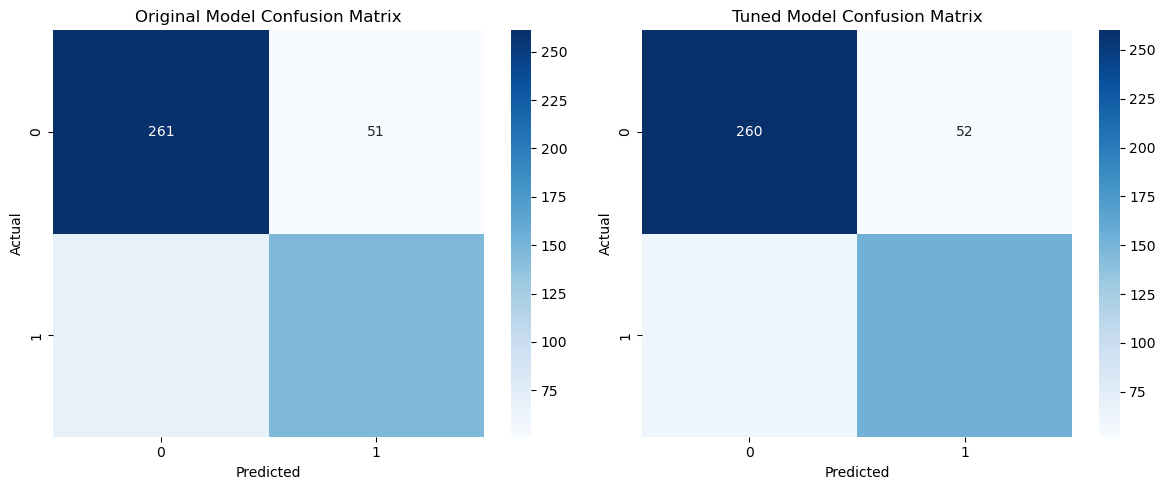

In [25]:

# Plot confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(original_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Original Model Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(best_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Tuned Model Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [26]:
# Accuracy values
initial_accuracy = 0.77  # Original accuracy
tuned_accuracy = best_score  # Best accuracy from grid search


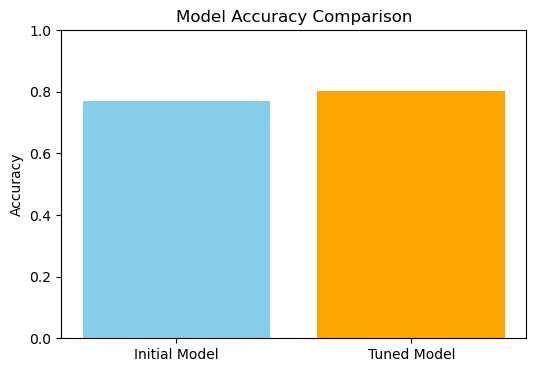

In [27]:

# Plot accuracy comparison
plt.figure(figsize=(6, 4))
plt.bar(['Initial Model', 'Tuned Model'], [initial_accuracy, tuned_accuracy], color=['skyblue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [28]:
# Extract the grid search results into a DataFrame
results = pd.DataFrame(grid_search.cv_results_)


In [29]:

# Pivot the results DataFrame to create a heatmap for 'C' and 'gamma'
heatmap_data = results.pivot_table(index='param_C', columns='param_gamma', values='mean_test_score')


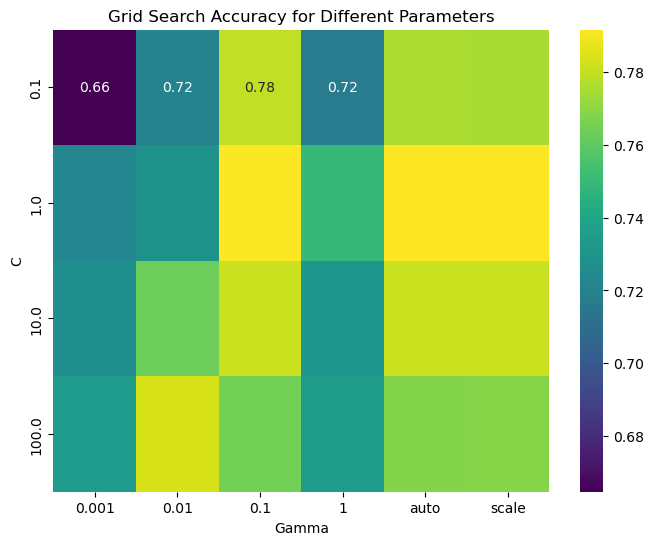

In [30]:

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Grid Search Accuracy for Different Parameters')
plt.xlabel('Gamma')
plt.ylabel('C')
plt.show()